In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Przetwarzanie wstępne obrazów

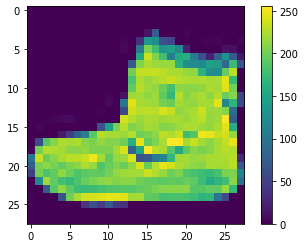

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images/255.0
test_images = test_images/255.0

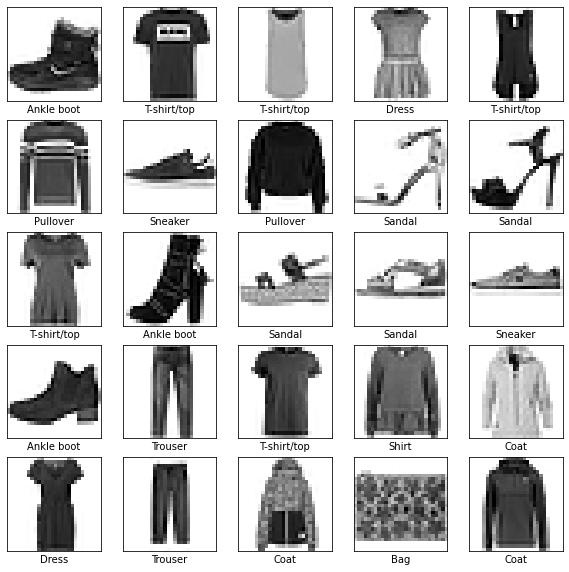

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
#budowa i konfiguracja modelu sieci neuronowej

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2305 - accuracy: 0.9129
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2236 - accuracy: 0.9168
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2135 - accuracy: 0.9196
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2104 - accuracy: 0.9211
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2050 - accuracy: 0.9231
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1981 - accuracy: 0.9257
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1944 - accuracy: 0.9278
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1882 - accuracy: 0.9300
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1844 - accuracy: 0.9315
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.177

In [14]:
#ocena dokładności
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f"\nDokładność danych testowych: {test_acc}")

313/313 - 1s - loss: 0.3509 - accuracy: 0.8906 - 583ms/epoch - 2ms/step

Dokładność danych testowych: 0.8906000256538391


In [15]:
#Prognozowanie

probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [17]:
predictions[0]

array([1.3201161e-10, 1.5078672e-10, 8.5813101e-12, 1.4407447e-10,
 8.0132644e-11, 7.8521507e-06, 5.6236439e-11, 3.1688454e-04,
 4.9915991e-09, 9.9967527e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
def plot_image(i,predictions_array,true_label,img):
    true_label,img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)
    
def plot_value_array(i,predictions_array,true_label):
    true_label= true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')